<a href="https://colab.research.google.com/github/FelipeSSFL/lia1_2024_2/blob/main/Entregas%20-%20Felipe%20Santos/ProjetoCapitulo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Criando espaço de trabalho**

In [ ]:
# Para garantir compatibilidade entre Python 2 e 3
from __future__ import division, print_function, unicode_literals

# Importações essenciais
import numpy as np  # Biblioteca para cálculos numéricos
import os  # Para manipular caminhos e pastas

# Para garantir que os resultados dos cálculos fiquem os mesmos a cada execução
np.random.seed(42)

# Para gerar gráficos visualmente agradáveis
# %matplotlib inline faz com que os gráficos apareçam diretamente no notebook
%matplotlib inline
import matplotlib as mpl  # Customiza visualmente os gráficos
import matplotlib.pyplot as plt  # Biblioteca para gerar gráficos
mpl.rc('axes', labelsize=14)  # Tamanho das legendas dos eixos
mpl.rc('xtick', labelsize=12)  # Tamanho dos números do eixo X
mpl.rc('ytick', labelsize=12)  # Tamanho dos números do eixo Y

# Define o diretório onde as figuras serão salvas
PROJECT_ROOT_DIR = "."  # Diretório raiz do projeto
CHAPTER_ID = "end_to_end_project"  # Nome da pasta para o capítulo/projeto
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)  # Caminho completo
os.makedirs(IMAGES_PATH, exist_ok=True)  # Cria a pasta, se não existir

# Função para salvar os gráficos em formato de imagem
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)  # Caminho completo do arquivo
    print("Saving figure", fig_id)  # Mostra qual figura está sendo salva
    if tight_layout:
        plt.tight_layout()  # Ajusta os espaçamentos do gráfico para não ficar cortado
    plt.savefig(path, format=fig_extension, dpi=resolution)  # Salva a figura com a resolução e formato definidos


## **Baixando os dados**

In [ ]:
# Importações essenciais
import os  # Para manipular caminhos e criar pastas
import tarfile  # Para lidar com arquivos compactados no formato .tar
import urllib.request  # Para baixar arquivos da internet

# URL raiz de onde os dados serão baixados
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
# Caminho onde os dados serão armazenados no computador
HOUSING_PATH = os.path.join("datasets", "housing")
# URL completa para baixar o arquivo de dados compactados
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

# Função para baixar e extrair os dados de habitação
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    # Cria o diretório se ele não existir
    os.makedirs(housing_path, exist_ok=True)
    # Define o caminho completo do arquivo compactado
    tgz_path = os.path.join(housing_path, "housing.tgz")
    # Baixa o arquivo de dados da URL e salva no caminho especificado
    urllib.request.urlretrieve(housing_url, tgz_path)
    # Abre o arquivo compactado
    housing_tgz = tarfile.open(tgz_path)
    # Extrai todo o conteúdo do arquivo para a pasta de destino
    housing_tgz.extractall(path=housing_path)
    # Fecha o arquivo compactado
    housing_tgz.close()

# Chama a função para baixar e extrair os dados
fetch_housing_data()

# Importa a biblioteca pandas para manipulação de dados
import pandas as pd

# Função para carregar os dados de habitação em um DataFrame
def load_housing_data(housing_path=HOUSING_PATH):
    # Define o caminho completo do arquivo CSV que contém os dados
    csv_path = os.path.join(housing_path, "housing.csv")
    # Lê o arquivo CSV e retorna um DataFrame
    return pd.read_csv(csv_path)

# Chama a função para carregar os dados e os armazena na variável 'housing'
housing = load_housing_data()
# Exibe as primeiras 5 linhas do DataFrame
housing.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## **Rápida olhada na estrutura dos dados**

In [ ]:
#Exibe um resumo conciso sobre o DataFrame
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
#Conta quantas vezes cada valor aparece na coluna ocean_proximity do DataFrame housing
housing["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [ ]:
#Gera estatísticas descritivas das colunas numéricas do DataFrame
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


**Histograma para cada atributo do DataFrame**

Saving figure attribute_histogram_plots


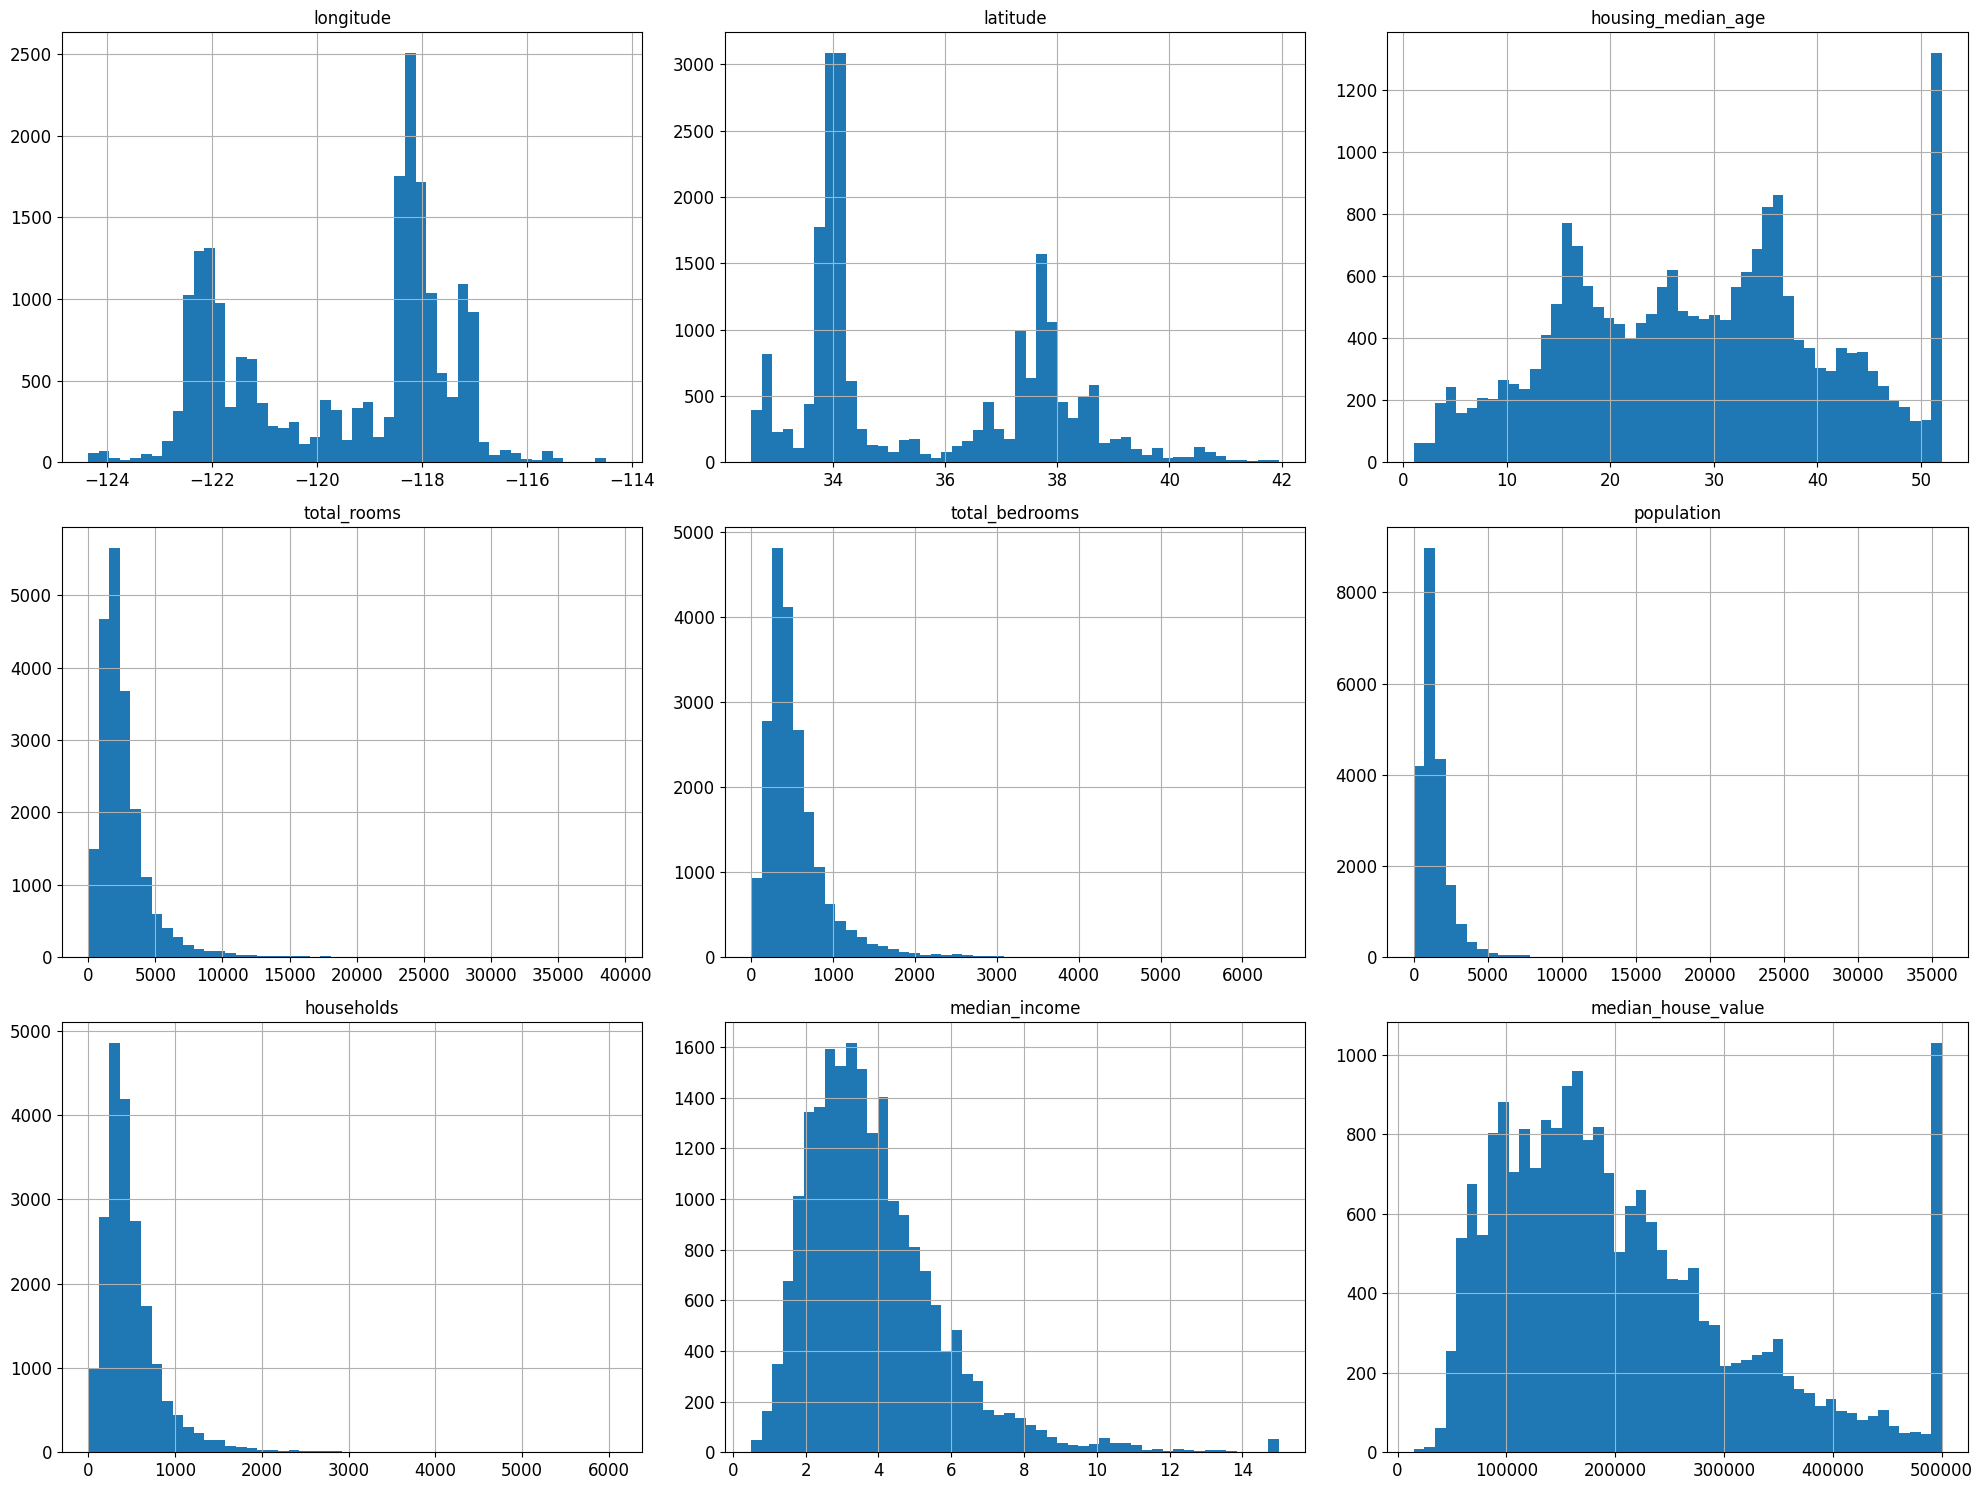

In [ ]:
# %matplotlib inline faz com que os gráficos apareçam diretamente no notebook
%matplotlib inline
import matplotlib.pyplot as plt  # Biblioteca para gerar gráficos

# Cria histogramas para cada coluna numérica do DataFrame 'housing'
# 'bins=50' define o número de divisões no histograma
# 'figsize=(20, 15)' ajusta o tamanho da figura
housing.hist(bins=50, figsize=(20,15))

# Salva a figura gerada com o nome "attribute_histogram_plots"
save_fig("attribute_histogram_plots")

# Mostra os gráficos gerados
plt.show()


## **Criando um Conjunto de Testes**

In [ ]:
# Define a semente aleatória para garantir que os resultados sejam os mesmos a cada execução
np.random.seed(42)
import numpy as np  # Biblioteca para cálculos numéricos

# Função personalizada para dividir os dados em conjuntos de treino e teste
# 'data' é o DataFrame e 'test_ratio' é a proporção de dados que irá para o conjunto de teste
def split_train_test(data, test_ratio):
    # Embaralha os índices do DataFrame de forma aleatória
    shuffled_indices = np.random.permutation(len(data))
    # Calcula o tamanho do conjunto de teste baseado na proporção especificada
    test_set_size = int(len(data) * test_ratio)
    # Seleciona os primeiros índices embaralhados para o conjunto de teste
    test_indices = shuffled_indices[:test_set_size]
    # Seleciona o restante para o conjunto de treino
    train_indices = shuffled_indices[test_set_size:]
    # Retorna dois subconjuntos do DataFrame: treino e teste
    return data.iloc[train_indices], data.iloc[test_indices]

# Divide o DataFrame 'housing' em conjuntos de treino e teste (80% treino, 20% teste)
train_set, test_set = split_train_test(housing, 0.2)

# Exibe o número de entradas em cada conjunto
print(len(train_set), "train +", len(test_set), "test")


16512 train + 4128 test


In [ ]:
from zlib import crc32  # Importa a função crc32 para calcular um checksum

# Função para verificar se um identificador deve estar no conjunto de teste
def test_set_check(identifier, test_ratio):
    # Calcula o checksum do identificador e verifica se está abaixo de um limite
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

# Função para dividir os dados em conjuntos de treino e teste com base em um identificador
def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]  # Extrai a coluna de identificadores
    # Aplica a função test_set_check a cada identificador para determinar se ele está no conjunto de teste
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    # Retorna os conjuntos de treino e teste
    return data.loc[~in_test_set], data.loc[in_test_set]

# Resetando o índice do DataFrame para adicionar uma coluna de índice
housing_with_id = housing.reset_index()
# Divide o DataFrame usando a coluna de índice
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

# Cria um identificador único baseado na longitude e latitude
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
# Divide novamente o DataFrame usando o novo identificador
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

# Exibe as primeiras 5 linhas do conjunto de teste
test_set.head()


,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
59,59,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,2.5625,60000.0,NEAR BAY,-122252.18
60,60,-122.29,37.83,52.0,1121.0,211.0,554.0,187.0,3.3929,75700.0,NEAR BAY,-122252.17
61,61,-122.29,37.82,49.0,135.0,29.0,86.0,23.0,6.1183,75000.0,NEAR BAY,-122252.18
62,62,-122.29,37.81,50.0,760.0,190.0,377.0,122.0,0.9011,86100.0,NEAR BAY,-122252.19
67,67,-122.29,37.80,52.0,1027.0,244.0,492.0,147.0,2.6094,81300.0,NEAR BAY,-122252.20


In [ ]:
from sklearn.model_selection import train_test_split  # Importa a função para dividir dados

# Divide o DataFrame 'housing' em conjuntos de treino e teste
# 'test_size=0.2' significa que 20% dos dados vão para o conjunto de teste
# 'random_state=42' garante que a divisão seja reprodutível
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

# Exibe as primeiras 5 linhas do conjunto de teste
test_set.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


**Histograma da renda média**

<Axes: >

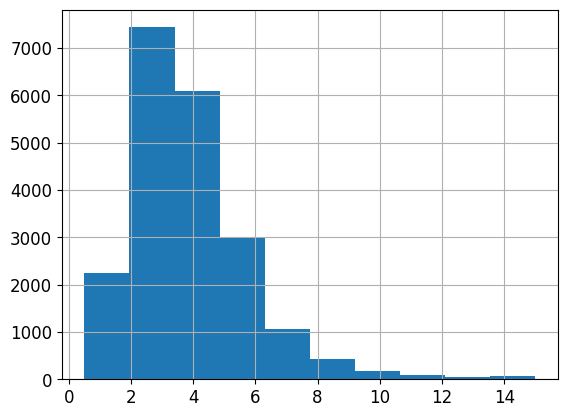

In [ ]:
# Gera um histograma da coluna median_income do DataFrame housing
housing["median_income"].hist()

In [ ]:
# Dividir a renda média por 1.5 para limitar o número de categorias de renda
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)

# Rotular as categorias acima de 5 como 5
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

# Alternativamente, usar pd.cut() para criar categorias de renda
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

# Contar quantas entradas estão em cada categoria de renda
housing["income_cat"].value_counts()


,count
income_cat,
3,7236
2,6581
4,3639
5,2362
1,822


**Histograma da distribuição das categorias de renda**

<Axes: >

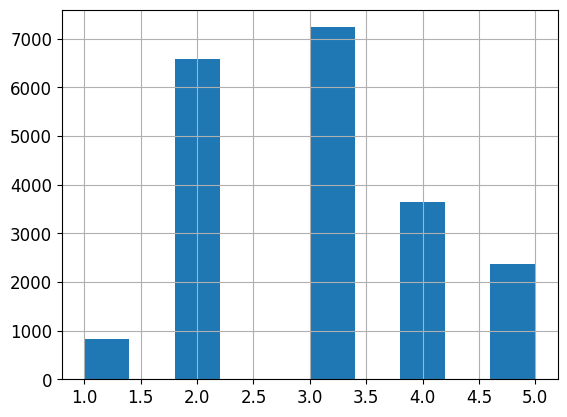

In [ ]:
# Gera um histograma da coluna income_cat do DataFrame housing
housing["income_cat"].hist()

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit  # Importa a classe para divisão estratificada

# Cria um objeto StratifiedShuffleSplit para realizar a divisão estratificada
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Realiza a divisão estratificada
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]  # Conjunto de treino
    strat_test_set = housing.loc[test_index]    # Conjunto de teste

# Calcula a proporção de cada categoria de renda no conjunto de teste
strat_test_set["income_cat"].value_counts() / len(strat_test_set)


,count
income_cat,
3,0.350533
2,0.318798
4,0.176357
5,0.114341
1,0.039971


In [ ]:
# Calcula a proporção de cada categoria de renda no DataFrame housing
housing["income_cat"].value_counts() / len(housing)

,count
income_cat,
3,0.350581
2,0.318847
4,0.176308
5,0.114438
1,0.039826


In [ ]:
def income_cat_proportions(data):
    # Função que calcula a proporção de cada categoria de renda
    return data["income_cat"].value_counts() / len(data)

# Divide o conjunto de dados original em conjuntos de treino e teste
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

# Cria um DataFrame para comparar as proporções das categorias de renda
compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),       # Proporções no conjunto original
    "Stratified": income_cat_proportions(strat_test_set),  # Proporções no conjunto de teste estratificado
    "Random": income_cat_proportions(test_set),       # Proporções no conjunto de teste aleatório
}).sort_index()  # Ordena o DataFrame pelo índice (categorias de renda)

# Calcula o erro percentual em relação ao conjunto original para o teste aleatório
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100

# Calcula o erro percentual em relação ao conjunto original para o teste estratificado
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

# Exibe o DataFrame com as proporções e os erros percentuais
compare_props


,Overall,Stratified,Random,Rand. %error,Strat. %error
income_cat,,,,,
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


## **Explorando e visualizando os dados para melhor entendimento**

**Distribuição Geográfica dos Dados de Habitação**

Saving figure bad_visualization_plot


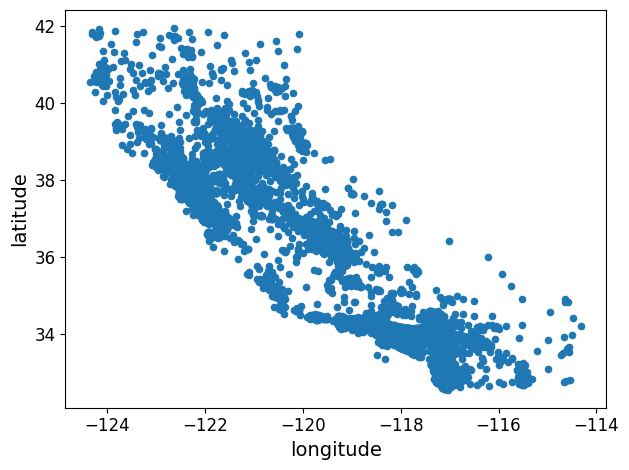

In [ ]:
housing = strat_train_set.copy()  # Cria uma cópia do conjunto de treino estratificado

# Cria um gráfico de dispersão com longitude no eixo x e latitude no eixo y
housing.plot(kind="scatter", x="longitude", y="latitude")

# Salva o gráfico gerado
save_fig("bad_visualization_plot")


**Distribuição Geográfica dos Dados de Habitação (Melhor visualização)**

Saving figure better_visualization_plot


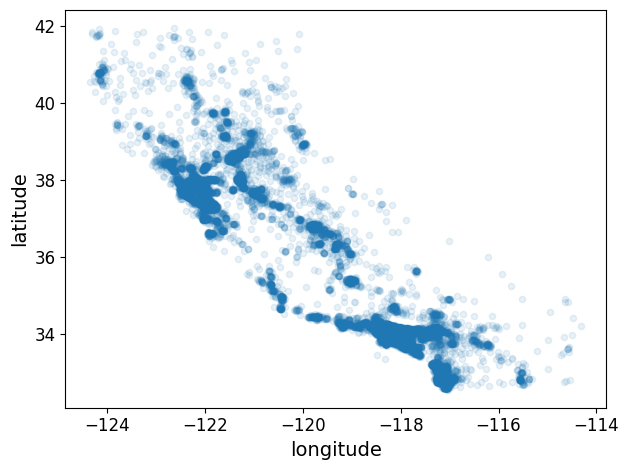

In [ ]:
# Cria um gráfico de dispersão com longitude no eixo x e latitude no eixo y, com transparência
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

# Salva o gráfico gerado
save_fig("better_visualization_plot")


**Valor das Casas em Relação à Localização**

Saving figure housing_prices_scatterplot


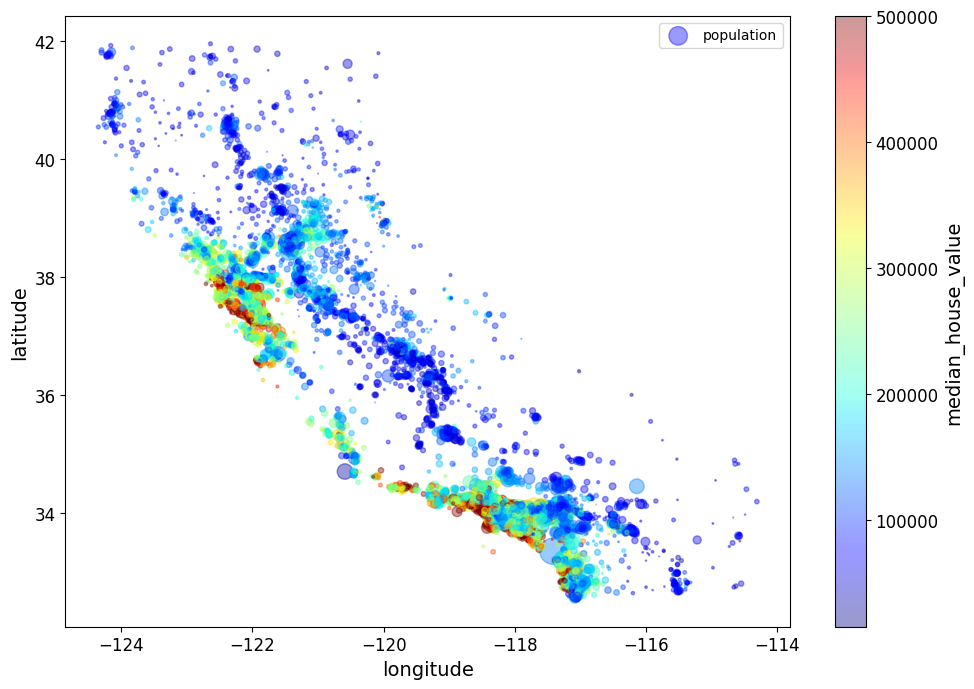

In [ ]:
# O argumento sharex=False corrige um bug de exibição (os valores do eixo x e a legenda não estavam sendo exibidos).
# Esta é uma correção temporária (veja: https://github.com/pandas-dev/pandas/issues/10611).
# Agradecimentos a Wilmer Arellano por apontar isso.

# Cria um gráfico de dispersão com várias características
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)

plt.legend()  # Adiciona a legenda ao gráfico
save_fig("housing_prices_scatterplot")  # Salva o gráfico gerado


In [ ]:
# Define o caminho onde as imagens serão salvas
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "end_to_end_project")
os.makedirs(images_path, exist_ok=True)  # Cria o diretório se não existir

# Define a URL de download das imagens
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
filename = "california.png"  # Nome do arquivo da imagem
print("Downloading", filename)  # Exibe uma mensagem informando que o download está começando

# Constrói a URL completa para download
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename

# Faz o download da imagem e a salva no diretório especificado
urllib.request.urlretrieve(url, os.path.join(images_path, filename))


('./images/end_to_end_project/california.png',
 <http.client.HTTPMessage at 0x782857fbe6b0>)

**Distribuição dos Preços das Casas com o mapa da Califórnia**

<ipython-input-23-923dc5ca4204>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(["$%dk" % (round(v/1000)) for v in tick_values], fontsize=14)  # Formata os rótulos da barra de cores


Saving figure california_housing_prices_plot


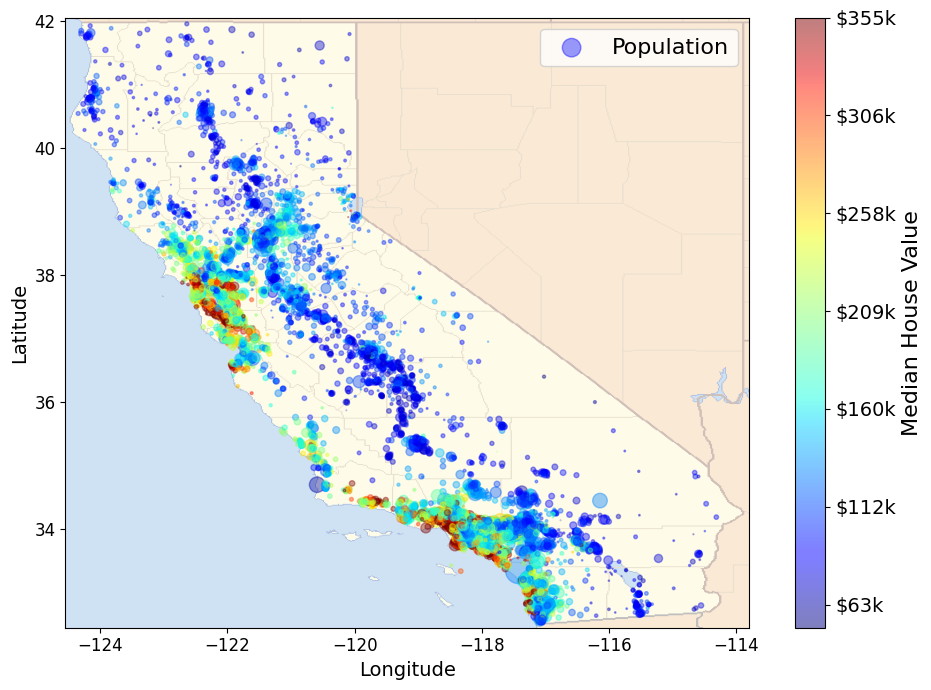

In [ ]:
import matplotlib.image as mpimg  # Importa o módulo para ler imagens
california_img = mpimg.imread(PROJECT_ROOT_DIR + '/images/end_to_end_project/california.png')  # Lê a imagem da Califórnia

# Cria um gráfico de dispersão com várias características
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                   s=housing['population']/100, label="Population",
                   c="median_house_value", cmap=plt.get_cmap("jet"),
                   colorbar=False, alpha=0.4)

# Exibe a imagem da Califórnia no gráfico, ajustando a extensão para cobrir a área correta
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))

# Adiciona rótulos aos eixos
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

# Obtém os valores dos preços medianos das casas
prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)  # Cria valores para o tick da barra de cores

# Adiciona uma barra de cores ao gráfico
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk" % (round(v/1000)) for v in tick_values], fontsize=14)  # Formata os rótulos da barra de cores
cbar.set_label('Median House Value', fontsize=16)  # Adiciona um rótulo à barra de cores

plt.legend(fontsize=16)  # Adiciona a legenda
save_fig("california_housing_prices_plot")  # Salva o gráfico gerado
plt.show()  # Exibe o gráfico


In [ ]:
# Cria uma matriz de correlação para as colunas numéricas do DataFrame housing
corr_matrix = housing.corr(numeric_only=True)

# Ordena os valores de correlação com relação ao valor mediano das casas em ordem decrescente
corr_matrix["median_house_value"].sort_values(ascending=False)


,median_house_value
median_house_value,1.000000
median_income,0.687151
total_rooms,0.135140
housing_median_age,0.114146
households,0.064590
total_bedrooms,0.047781
population,-0.026882
longitude,-0.047466
latitude,-0.142673


**Matriz de Dispersão dos Atributos da Habitação**

Saving figure scatter_matrix_plot


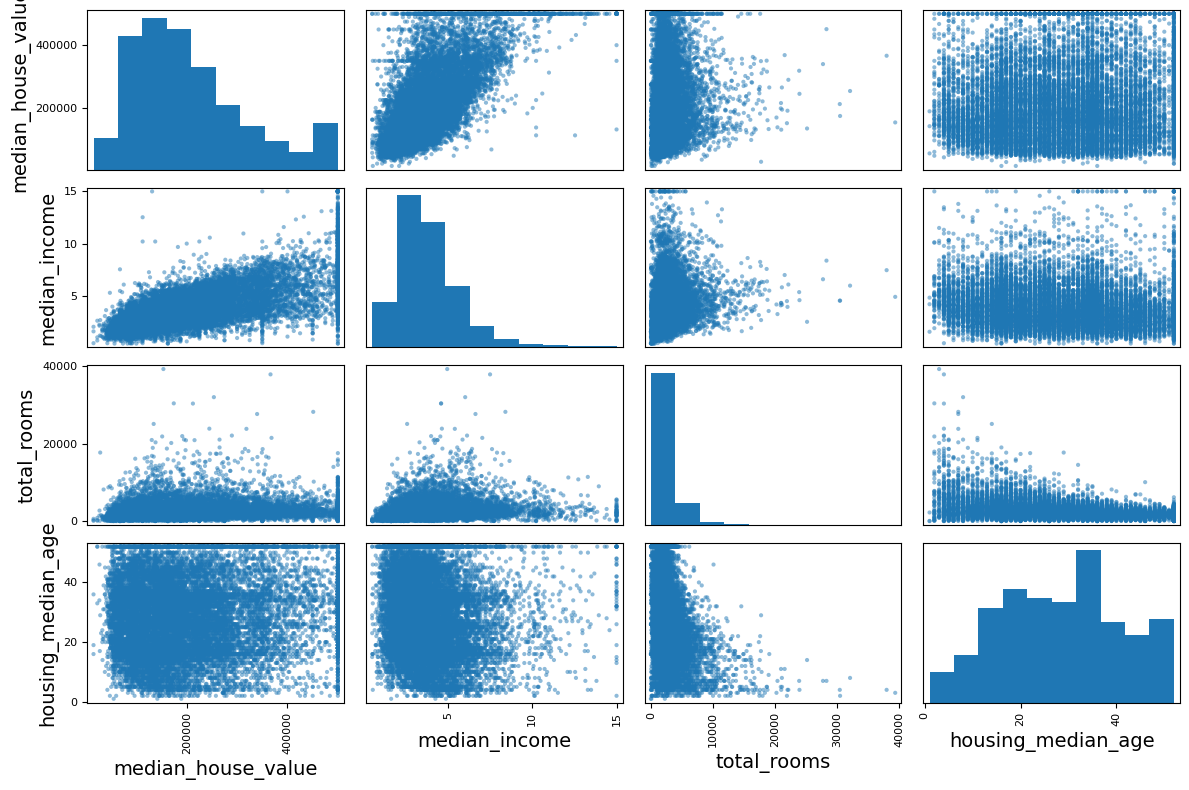

In [ ]:
# Importa scatter_matrix do módulo de plotagem do Pandas
from pandas.plotting import scatter_matrix  # Importa a função scatter_matrix para criar matrizes de dispersão

# Define os atributos que serão usados no gráfico
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

# Cria uma matriz de dispersão com os atributos selecionados
scatter_matrix(housing[attributes], figsize=(12, 8))

# Salva o gráfico gerado
save_fig("scatter_matrix_plot")


**Relação entre Renda Mediana e Valor da Casa**

Saving figure income_vs_house_value_scatterplot


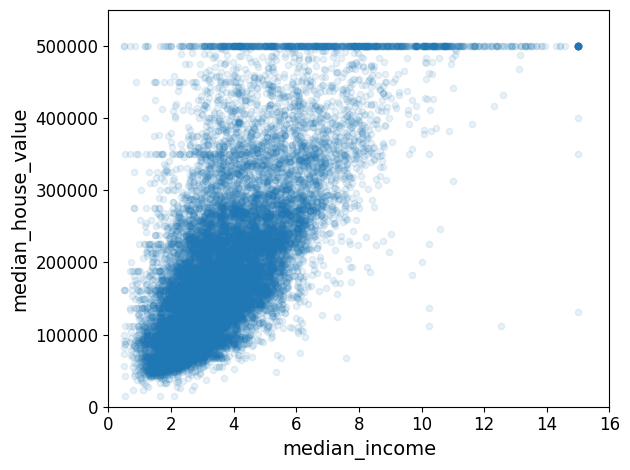

In [ ]:
# Cria um gráfico de dispersão para visualizar a relação entre renda e valor das casas
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

# Define os limites dos eixos x e y do gráfico
plt.axis([0, 16, 0, 550000])

# Salva o gráfico gerado com o nome "income_vs_house_value_scatterplot"
save_fig("income_vs_house_value_scatterplot")


In [ ]:
# Cria novas colunas no DataFrame housing para calcular razões úteis
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]  # Total de quartos por domicílio
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]  # Total de quartos por quarto
housing["population_per_household"] = housing["population"] / housing["households"]  # População por domicílio

# Nota: houve um erro na célula anterior, na definição do atributo rooms_per_household.
# Isso explica por que o valor da correlação abaixo difere ligeiramente do valor no livro (a menos que você esteja lendo a versão mais recente).

# Faz uma nova matriz de correlação para as colunas numéricas
corr_matrix = housing.corr(numeric_only=True)

# Ordena os valores de correlação com relação ao valor mediano das casas em ordem decrescente
corr_matrix["median_house_value"].sort_values(ascending=False)


,median_house_value
median_house_value,1.000000
median_income,0.687151
rooms_per_household,0.146255
total_rooms,0.135140
housing_median_age,0.114146
households,0.064590
total_bedrooms,0.047781
population_per_household,-0.021991
population,-0.026882
longitude,-0.047466


**Relação entre Quartos por Domicílio e Valor Médio da Casa**

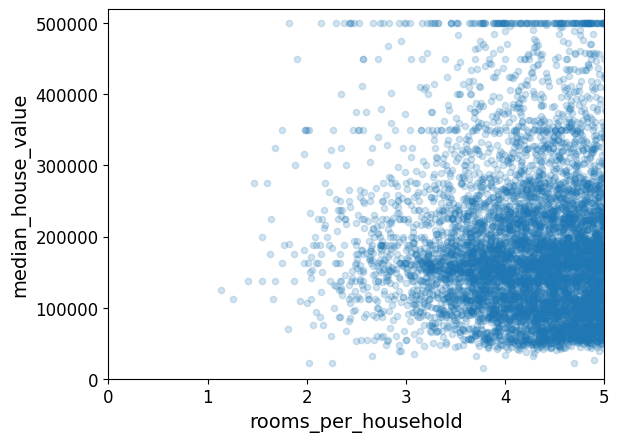

In [ ]:
# Cria um gráfico de dispersão para visualizar a relação entre quartos por domicílio e valor das casas
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value", alpha=0.2)

# Define os limites dos eixos x e y do gráfico
plt.axis([0, 5, 0, 520000])

# Exibe o gráfico
plt.show()


In [ ]:
# Gera estatísticas descritivas para as colunas numéricas do DataFrame housing
housing.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000
mean,-119.575635,35.639314,28.653404,2622.539789,534.914639,1419.687379,497.011810,3.875884,207005.322372,5.440406,0.212873,3.096469
std,2.001828,2.137963,12.574819,2138.417080,412.665649,1115.663036,375.696156,1.904931,115701.297250,2.611696,0.057378,11.584825
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,1.130435,0.100000,0.692308
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566950,119800.000000,4.442168,0.175304,2.431352
50%,-118.510000,34.260000,29.000000,2119.000000,433.000000,1164.000000,408.000000,3.541550,179500.000000,5.232342,0.203027,2.817661
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.000000,602.000000,4.745325,263900.000000,6.056361,0.239816,3.281420
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


## **Preparando os Dados para os Algoritmos de Machine Learning**

In [ ]:
# Remove a coluna "median_house_value" do conjunto de treinamento, deixando apenas as características
housing = strat_train_set.drop("median_house_value", axis=1)  # Remove rótulos do conjunto de treinamento

# Cria uma cópia da coluna "median_house_value" para os rótulos do conjunto de treinamento
housing_labels = strat_train_set["median_house_value"].copy()

# Exibe amostras de linhas que possuem valores ausentes
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()  # Exibe amostras de linhas incompletas

# Mostra as linhas incompletas
sample_incomplete_rows


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580,NEAR OCEAN


In [ ]:
# Remove as linhas do DataFrame sample_incomplete_rows onde a coluna "total_bedrooms" tem valores ausentes
sample_incomplete_rows.dropna(subset=["total_bedrooms"])  # Opção 1


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [ ]:
# Remove a coluna "total_bedrooms" do DataFrame sample_incomplete_rows
sample_incomplete_rows.drop("total_bedrooms", axis=1)  # Opção 2


,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,1145.0,480.0,6.3580,NEAR OCEAN


In [ ]:
# Calcula a mediana da coluna "total_bedrooms" no DataFrame housing
median = housing["total_bedrooms"].median()

# Substitui os valores ausentes na coluna "total_bedrooms" com a mediana calculada
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True)  # Opção 3

# Exibe o DataFrame atualizado com valores preenchidos
sample_incomplete_rows


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580,NEAR OCEAN


In [ ]:
# Aviso: Desde a versão 0.20 do Scikit-Learn, a classe sklearn.preprocessing.Imputer foi substituída pela classe sklearn.impute.SimpleImputer.

# Tenta importar a classe SimpleImputer do módulo sklearn.impute
try:
    from sklearn.impute import SimpleImputer  # Scikit-Learn 0.20+
except ImportError:
    from sklearn.preprocessing import Imputer as SimpleImputer  # Para versões mais antigas

# Cria um imputer que usa a mediana para preencher valores ausentes
imputer = SimpleImputer(strategy="median")

# Remove a coluna de texto 'ocean_proximity' porque a mediana só pode ser calculada em atributos numéricos
housing_num = housing.drop('ocean_proximity', axis=1)

# Alternativa: seleciona apenas colunas numéricas
# housing_num = housing.select_dtypes(include=[np.number])

# Ajusta o imputer nos dados numéricos
imputer.fit(housing_num)


SimpleImputer(strategy='median')

In [ ]:
# Obtém as estatísticas (neste caso, a mediana) calculadas pelo imputer para cada coluna numérica
imputer.statistics_


array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [ ]:
# Calcula a mediana de cada coluna numérica no DataFrame housing_num e retorna os valores como um array
housing_num.median().values


array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [ ]:
# Aplica a transformação do imputer para substituir valores ausentes na matriz housing_num
X = imputer.transform(housing_num)

# Cria um novo DataFrame housing_tr com os dados transformados, mantendo as colunas e índices originais
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing.index)

# Exibe as linhas do DataFrame transformado que correspondem ao índice de sample_incomplete_rows
housing_tr.loc[sample_incomplete_rows.index.values]


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580


In [ ]:
# Acessa a estratégia usada pelo imputer para substituir valores ausentes
imputer.strategy


'median'

In [ ]:
# Cria um novo DataFrame housing_tr com os dados transformados, mantendo as colunas e índices do DataFrame original housing_num
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

# Exibe as primeiras cinco linhas do DataFrame housing_tr
housing_tr.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


In [ ]:
# Cria um novo DataFrame housing_cat contendo apenas a coluna 'ocean_proximity'
housing_cat = housing[['ocean_proximity']]

# Exibe as primeiras dez linhas do DataFrame housing_cat
housing_cat.head(10)


,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [ ]:
# Tenta importar OrdinalEncoder da biblioteca sklearn.preprocessing
try:
    from sklearn.preprocessing import OrdinalEncoder
except ImportError:
    from future_encoders import OrdinalEncoder  # Para versões mais antigas do Scikit-Learn

# Cria uma instância do OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

# Ajusta o encoder aos dados categóricos e transforma as categorias em valores numéricos
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

# Exibe os primeiros 10 valores codificados
housing_cat_encoded[:10]


array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [ ]:
# Acessa as categorias que foram codificadas pelo OrdinalEncoder
ordinal_encoder.categories_


[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [ ]:
# Tenta importar OrdinalEncoder e OneHotEncoder da biblioteca sklearn.preprocessing
try:
    from sklearn.preprocessing import OrdinalEncoder  # Apenas para gerar um ImportError se Scikit-Learn < 0.20
    from sklearn.preprocessing import OneHotEncoder
except ImportError:
    from future_encoders import OneHotEncoder  # Para versões mais antigas do Scikit-Learn

# Cria uma instância do OneHotEncoder
cat_encoder = OneHotEncoder()

# Ajusta o encoder aos dados categóricos e transforma as categorias em uma representação one-hot
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

# Exibe a matriz resultante da codificação one-hot
housing_cat_1hot


<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [ ]:
# Converte a matriz esparsa resultante da codificação one-hot em um array NumPy denso
housing_cat_1hot.toarray()


array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [ ]:
# Cria uma instância do OneHotEncoder com sparse=False para obter uma matriz densa
cat_encoder = OneHotEncoder(sparse=False)

# Ajusta o encoder aos dados categóricos e transforma as categorias em uma representação one-hot
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

# Exibe a matriz resultante da codificação one-hot
housing_cat_1hot


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [ ]:
cat_encoder.categories_  # Acessa as categorias originais que foram codificadas pelo OneHotEncoder


[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [ ]:
housing.columns  # Retorna uma lista com os nomes das colunas do DataFrame 'housing'


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

# Obtém os índices das colunas corretas: mais seguro do que codificar os índices 3, 4, 5, 6
rooms_ix, bedrooms_ix, population_ix, household_ix = [
    list(housing.columns).index(col)  # Obtém o índice de cada coluna pelo nome
    for col in ("total_rooms", "total_bedrooms", "population", "households")]

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):  # sem *args ou **kwargs
        self.add_bedrooms_per_room = add_bedrooms_per_room  # Atributo para controlar se a proporção de quartos por casa deve ser adicionada
    def fit(self, X, y=None):
        return self  # Nada mais a fazer no ajuste
    def transform(self, X, y=None):
        # Calcula proporções
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]  # Proporção de quartos por casa
        population_per_household = X[:, population_ix] / X[:, household_ix]  # Proporção de população por casa
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]  # Proporção de quartos por total de quartos
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]  # Adiciona as novas colunas
        else:
            return np.c_[X, rooms_per_household, population_per_household]  # Retorna sem a coluna de quartos por total de quartos

# Cria uma instância do transformador com a opção de não adicionar a proporção de quartos
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)  # Aplica a transformação

# Alternativamente, você pode usar a classe FunctionTransformer do Scikit-Learn que permite criar facilmente um transformador baseado em uma função de transformação
# Note que precisamos definir validate=False porque os dados contêm valores que não são float (validate será definido como False na versão 0.22 do Scikit-Learn).
from sklearn.preprocessing import FunctionTransformer

def add_extra_features(X, add_bedrooms_per_room=True):
    # Função que calcula as proporções
    rooms_per_household = X[:, rooms_ix] / X[:, household_ix]  # Proporção de quartos por casa
    population_per_household = X[:, population_ix] / X[:, household_ix]  # Proporção de população por casa
    if add_bedrooms_per_room:
        bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]  # Proporção de quartos por total de quartos
        return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]  # Adiciona as novas colunas
    else:
        return np.c_[X, rooms_per_household, population_per_household]  # Retorna sem a coluna de quartos por total de quartos

# Cria uma instância do FunctionTransformer
attr_adder = FunctionTransformer(add_extra_features, validate=False,
                                 kw_args={"add_bedrooms_per_room": False})  # Configura a função com o argumento
housing_extra_attribs = attr_adder.fit_transform(housing.values)  # Aplica a transformação

# Cria um DataFrame com as novas colunas e os nomes apropriados
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns) + ["rooms_per_household", "population_per_household"],
    index=housing.index)  # Mantém o índice original
housing_extra_attribs.head()  # Mostra as primeiras linhas do DataFrame resultante


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,5.485836,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,6.927083,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.875,INLAND,5.393333,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,3.886128,1.859213
20496,-118.7,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,6.096552,3.167241


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Cria um pipeline de pré-processamento para os dados numéricos
num_pipeline = Pipeline([  # Pipeline que encadeia várias etapas de pré-processamento
        ('imputer', SimpleImputer(strategy="median")),  # Imputa valores ausentes usando a mediana
        ('attribs_adder', FunctionTransformer(add_extra_features, validate=False)),  # Adiciona atributos extras (proporções)
        ('std_scaler', StandardScaler()),  # Normaliza os dados para ter média 0 e desvio padrão 1
    ])

# Aplica o pipeline ao conjunto de dados numéricos
housing_num_tr = num_pipeline.fit_transform(housing_num)  # Ajusta e transforma os dados
housing_num_tr  # Exibe os dados transformados


array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
         0.00622264, -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.04081077, -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.07537122, -0.33827252],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
        -0.03743619,  0.32286937],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.05915604, -0.45702273],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
         0.00657083, -0.12169672]])

In [ ]:
try:
    from sklearn.compose import ColumnTransformer  # Tenta importar ColumnTransformer para combinar transformações
except ImportError:
    from future_encoders import ColumnTransformer  # Importa de um pacote alternativo se a versão do Scikit-Learn for antiga

# Define quais colunas são numéricas e quais são categóricas
num_attribs = list(housing_num)  # Atributos numéricos
cat_attribs = ["ocean_proximity"]  # Atributo categórico

# Cria um transformador de coluna que aplica diferentes transformações a diferentes colunas
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),  # Aplica o pipeline numérico às colunas numéricas
        ("cat", OneHotEncoder(), cat_attribs),  # Aplica OneHotEncoder ao atributo categórico
    ])

# Prepara os dados aplicando o pipeline completo
housing_prepared = full_pipeline.fit_transform(housing)  # Ajusta e transforma os dados
housing_prepared  # Exibe os dados preparados


array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
# Retorna as dimensões do array housing_prepared
housing_prepared.shape

(16512, 16)

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

# Cria uma classe para selecionar colunas numéricas ou categóricas
class OldDataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names  # Armazena os nomes dos atributos a serem selecionados
    def fit(self, X, y=None):
        return self  # Método necessário para a interface do Scikit-Learn, mas não faz nada aqui
    def transform(self, X):
        return X[self.attribute_names].values  # Retorna os valores das colunas selecionadas

# Agora vamos juntar todos esses componentes em um grande pipeline que irá pré-processar tanto as características numéricas quanto as categóricas
num_attribs = list(housing_num)  # Atributos numéricos
cat_attribs = ["ocean_proximity"]  # Atributo categórico

# Pipeline para atributos numéricos
old_num_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(num_attribs)),  # Seleciona os atributos numéricos
        ('imputer', SimpleImputer(strategy="median")),  # Imputa valores ausentes com a mediana
        ('attribs_adder', FunctionTransformer(add_extra_features, validate=False)),  # Adiciona atributos extras
        ('std_scaler', StandardScaler()),  # Normaliza os dados
    ])

# Pipeline para atributos categóricos
old_cat_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(cat_attribs)),  # Seleciona o atributo categórico
        ('cat_encoder', OneHotEncoder(sparse=False)),  # Codifica categorias usando OneHotEncoder
    ])

from sklearn.pipeline import FeatureUnion

# Junta os dois pipelines em um único pipeline completo
old_full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", old_num_pipeline),  # Pipeline para atributos numéricos
        ("cat_pipeline", old_cat_pipeline),  # Pipeline para atributos categóricos
    ])

# Prepara os dados aplicando o pipeline completo
old_housing_prepared = old_full_pipeline.fit_transform(housing)  # Ajusta e transforma os dados
old_housing_prepared  # Exibe os dados preparados


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
# Verifica se todos os elementos dos arrays housing_prepared e old_housing_prepared são aproximadamente iguais
np.allclose(housing_prepared, old_housing_prepared)

True

## **Selecionando e Treinando um Modelo**

In [ ]:
from sklearn.linear_model import LinearRegression  # Importa a classe LinearRegression do scikit-learn

# Cria uma instância do modelo de regressão linear
lin_reg = LinearRegression()

# Ajusta o modelo aos dados de treinamento
# housing_prepared: dados pré-processados com as características
# housing_labels: rótulos que representam os valores de saída (preços das casas)
lin_reg.fit(housing_prepared, housing_labels)


LinearRegression()

In [ ]:
# Vamos testar o pipeline de pré-processamento completo em algumas instâncias de treinamento
some_data = housing.iloc[:5]  # Seleciona as primeiras 5 linhas do conjunto de dados
some_labels = housing_labels.iloc[:5]  # Seleciona os rótulos correspondentes às 5 linhas

# Aplica o pipeline de pré-processamento completo às instâncias selecionadas
some_data_prepared = full_pipeline.transform(some_data)

# Faz previsões com o modelo treinado usando os dados pré-processados
print("Predictions:", lin_reg.predict(some_data_prepared))


Predictions: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]


In [ ]:
# Exibe os rótulos correspondentes às instâncias de treinamento selecionadas
print("Labels:", list(some_labels))  # Converte os rótulos em uma lista e imprime


Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [ ]:
# Exibe os dados pré-processados para as instâncias de treinamento selecionadas
some_data_prepared  # Mostra a matriz de características após o pré-processamento


array([[-0.94135046,  1.34743822,  0.02756357,  0.58477745,  0.64037127,
         0.73260236,  0.55628602, -0.8936472 ,  0.01739526,  0.00622264,
        -0.12112176,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.17178212, -1.19243966, -1.72201763,  1.26146668,  0.78156132,
         0.53361152,  0.72131799,  1.292168  ,  0.56925554, -0.04081077,
        -0.81086696,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, -0.46977281, -0.54513828,
        -0.67467519, -0.52440722, -0.52543365, -0.01802432, -0.07537122,
        -0.33827252,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.22173797, -1.35147437, -0.37006852, -0.34865152, -0.03636724,
        -0.46761716, -0.03729672, -0.86592882, -0.59513997, -0.10680295,
         0.96120521,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.43743108, -0.63581817, -0

In [ ]:
from sklearn.metrics import mean_squared_error  # Importa a função para calcular o erro quadrático médio

# Faz previsões para todo o conjunto de dados pré-processados
housing_predictions = lin_reg.predict(housing_prepared)

# Calcula o erro quadrático médio (MSE) entre os rótulos reais e as previsões
lin_mse = mean_squared_error(housing_labels, housing_predictions)

# Calcula a raiz do erro quadrático médio (RMSE) para ter uma medida mais interpretável
lin_rmse = np.sqrt(lin_mse)

# Exibe o RMSE
lin_rmse


68627.87390018745

In [ ]:
from sklearn.metrics import mean_absolute_error  # Importa a função para calcular o erro absoluto médio

# Calcula o erro absoluto médio (MAE) entre os rótulos reais e as previsões
lin_mae = mean_absolute_error(housing_labels, housing_predictions)

# Exibe o MAE
lin_mae


49438.66860915801

In [ ]:
from sklearn.tree import DecisionTreeRegressor  # Importa o regressor de árvore de decisão

# Cria uma instância do regressor de árvore de decisão com um estado aleatório fixo para reprodutibilidade
tree_reg = DecisionTreeRegressor(random_state=42)

# Ajusta o modelo ao conjunto de dados pré-processados e aos rótulos
tree_reg.fit(housing_prepared, housing_labels)


DecisionTreeRegressor(random_state=42)

In [ ]:
# Faz previsões usando o modelo de árvore de decisão ajustado
housing_predictions = tree_reg.predict(housing_prepared)

# Calcula o erro quadrático médio (MSE) entre os rótulos reais e as previsões
tree_mse = mean_squared_error(housing_labels, housing_predictions)

# Calcula a raiz do erro quadrático médio (RMSE) para obter uma medida na mesma unidade dos dados
tree_rmse = np.sqrt(tree_mse)

# Exibe o RMSE
tree_rmse


0.0

## **Ajustando o Modelo**

In [ ]:
from sklearn.model_selection import cross_val_score

# Realiza validação cruzada com 10 dobras, avaliando o desempenho do modelo de árvore de decisão
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)

# Converte os scores de MSE (negativos) para RMSE
tree_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    # Exibe os scores individuais, a média e o desvio padrão
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

# Chama a função para exibir os resultados da validação cruzada
display_scores(tree_rmse_scores)


Scores: [72831.45749112 69973.18438322 69528.56551415 72517.78229792
 69145.50006909 79094.74123727 68960.045444   73344.50225684
 69826.02473916 71077.09753998]
Mean: 71629.89009727491
Standard deviation: 2914.035468468928


In [ ]:
from sklearn.model_selection import cross_val_score

# Realiza validação cruzada com 10 dobras para o modelo de regressão linear
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)

# Converte os scores de MSE (negativos) para RMSE
lin_rmse_scores = np.sqrt(-lin_scores)

# Chama a função para exibir os resultados da validação cruzada
display_scores(lin_rmse_scores)


Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard deviation: 2880.3282098180625


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Cria um modelo de Regressão Random Forest com 10 árvores (n_estimators)
forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)

# Treina o modelo usando os dados preparados e os rótulos (labels)
forest_reg.fit(housing_prepared, housing_labels)


RandomForestRegressor(n_estimators=10, random_state=42)

In [ ]:
# Faz previsões sobre os dados preparados usando o modelo de Regressão Random Forest
housing_predictions = forest_reg.predict(housing_prepared)

# Calcula o erro quadrático médio (MSE) das previsões
forest_mse = mean_squared_error(housing_labels, housing_predictions)

# Calcula a raiz do erro quadrático médio (RMSE) para facilitar a interpretação
forest_rmse = np.sqrt(forest_mse)

# Exibe o RMSE
forest_rmse


22413.454658589766

In [ ]:
# Avalia o desempenho do modelo Random Forest usando validação cruzada
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                 scoring="neg_mean_squared_error", cv=10)

# Converte os scores negativos do MSE para RMSE
forest_rmse_scores = np.sqrt(-forest_scores)

# Função para exibir os resultados
display_scores(forest_rmse_scores)


Scores: [53519.05518628 50467.33817051 48924.16513902 53771.72056856
 50810.90996358 54876.09682033 56012.79985518 52256.88927227
 51527.73185039 55762.56008531]
Mean: 52792.92669114079
Standard deviation: 2262.8151900582


In [ ]:
# Realiza validação cruzada para o modelo de regressão linear
scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)

# Converte os scores negativos do MSE para RMSE e gera uma descrição estatística
pd.Series(np.sqrt(-scores)).describe()


,0
count,10.000000
mean,69104.079982
std,3036.132517
min,64114.991664
25%,67077.398482
50%,68718.763507
75%,71357.022543
max,73997.080502


In [ ]:
from sklearn.svm import SVR

# Cria um modelo de Regressão de Vetores de Suporte com kernel linear
svm_reg = SVR(kernel="linear")

# Treina o modelo com os dados preparados
svm_reg.fit(housing_prepared, housing_labels)

# Faz previsões com os dados de treinamento
housing_predictions = svm_reg.predict(housing_prepared)

# Calcula o erro quadrático médio (MSE) das previsões
svm_mse = mean_squared_error(housing_labels, housing_predictions)

# Converte o MSE para raiz do erro quadrático médio (RMSE)
svm_rmse = np.sqrt(svm_mse)

# Exibe o RMSE
svm_rmse


111095.06635291968

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define o grid de hiperparâmetros a ser testado
param_grid = [
    # Tente 12 combinações de hiperparâmetros
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # Em seguida, tente combinações com bootstrap definido como False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

# Cria uma instância do modelo RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=42)

# Configura a busca em grade com 5 divisões para validação cruzada
# Isso resulta em um total de (12+6)*5=90 rodadas de treinamento
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)

# Treina o modelo com os dados preparados
grid_search.fit(housing_prepared, housing_labels)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
# Retorna os melhores hiperparâmetros encontrados pela busca em grade
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [ ]:
# 'grid_search' é o objeto que faz a busca dos melhores parâmetros para o modelo.
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [ ]:
# 'cvres' tem os resultados do grid_search.
cvres = grid_search.cv_results_

# Loop nas médias das pontuações e parâmetros testados.
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    # Mostra a raiz quadrada da pontuação negativa e os parâmetros.
    print(np.sqrt(-mean_score), params)


63895.161577951665 {'max_features': 2, 'n_estimators': 3}
54916.32386349543 {'max_features': 2, 'n_estimators': 10}
52885.86715332332 {'max_features': 2, 'n_estimators': 30}
60075.3680329983 {'max_features': 4, 'n_estimators': 3}
52495.01284985185 {'max_features': 4, 'n_estimators': 10}
50187.24324926565 {'max_features': 4, 'n_estimators': 30}
58064.73529982314 {'max_features': 6, 'n_estimators': 3}
51519.32062366315 {'max_features': 6, 'n_estimators': 10}
49969.80441627874 {'max_features': 6, 'n_estimators': 30}
58895.824998155826 {'max_features': 8, 'n_estimators': 3}
52459.79624724529 {'max_features': 8, 'n_estimators': 10}
49898.98913455217 {'max_features': 8, 'n_estimators': 30}
62381.765106921855 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54476.57050944266 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59974.60028085155 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52754.5632813202 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

In [ ]:
# Converte os resultados da validação cruzada (cv_results_) em um DataFrame para melhor visualização.
pd.DataFrame(grid_search.cv_results_)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.081029,0.001399,0.003779,0.000326,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-4.119912e+09,-3.723465e+09,...,-4.082592e+09,1.867375e+08,18,-1.155630e+09,-1.089726e+09,-1.153843e+09,-1.118149e+09,-1.093446e+09,-1.122159e+09,2.834288e+07
1,0.276565,0.008178,0.011958,0.000677,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-2.973521e+09,-2.810319e+09,...,-3.015803e+09,1.139808e+08,11,-5.982947e+08,-5.904781e+08,-6.123850e+08,-5.727681e+08,-5.905210e+08,-5.928894e+08,1.284978e+07
2,0.803133,0.013578,0.031676,0.001076,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.801229e+09,-2.671474e+09,...,-2.796915e+09,7.980892e+07,9,-4.412567e+08,-4.326398e+08,-4.553722e+08,-4.320746e+08,-4.311606e+08,-4.385008e+08,9.184397e+06
3,0.137309,0.001974,0.003678,0.000264,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.528743e+09,-3.490303e+09,...,-3.609050e+09,1.375683e+08,16,-9.782368e+08,-9.806455e+08,-1.003780e+09,-1.016515e+09,-1.011270e+09,-9.980896e+08,1.577372e+07
4,0.442008,0.003550,0.010681,0.000131,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.742620e+09,-2.609311e+09,...,-2.755726e+09,1.182604e+08,7,-5.063215e+08,-5.257983e+08,-5.081984e+08,-5.174405e+08,-5.282066e+08,-5.171931e+08,8.882622e+06
5,1.348133,0.021095,0.032683,0.001294,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.522176e+09,-2.440241e+09,...,-2.518759e+09,8.488084e+07,3,-3.776568e+08,-3.902106e+08,-3.885042e+08,-3.830866e+08,-3.894779e+08,-3.857872e+08,4.774229e+06
6,0.183549,0.001775,0.003713,0.000099,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.362127e+09,-3.311863e+09,...,-3.371513e+09,1.378086e+08,13,-8.909397e+08,-9.583733e+08,-9.000201e+08,-8.964731e+08,-9.151927e+08,-9.121998e+08,2.444837e+07
7,0.620054,0.004346,0.011200,0.000215,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.622099e+09,-2.669655e+09,...,-2.654240e+09,6.967978e+07,5,-4.939906e+08,-5.145996e+08,-5.023512e+08,-4.959467e+08,-5.147087e+08,-5.043194e+08,8.880106e+06
8,1.897424,0.026971,0.032354,0.000924,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.446142e+09,-2.446594e+09,...,-2.496981e+09,7.357046e+07,2,-3.760968e+08,-3.876636e+08,-3.875307e+08,-3.760938e+08,-3.861056e+08,-3.826981e+08,5.418747e+06
9,0.245303,0.002684,0.003986,0.000257,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.590333e+09,-3.232664e+09,...,-3.468718e+09,1.293758e+08,14,-9.505012e+08,-9.166119e+08,-9.033910e+08,-9.070642e+08,-9.459386e+08,-9.247014e+08,1.973471e+07


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define os intervalos de valores possíveis para os hiperparâmetros
param_distribs = {
        'n_estimators': randint(low=1, high=200),  # Número de árvores entre 1 e 200
        'max_features': randint(low=1, high=8),    # Máximo de recursos entre 1 e 8
    }

# Cria o modelo RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=42)

# RandomizedSearchCV tenta combinações aleatórias dos parâmetros definidos
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10,  # Número de combinações aleatórias a testar
                                cv=5,  # Validação cruzada com 5 divisões
                                scoring='neg_mean_squared_error',  # Métrica usada para avaliação
                                random_state=42)

# Treina o modelo com os dados preparados
rnd_search.fit(housing_prepared, housing_labels)


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78285b23ec50>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78285b23f220>},
                   random_state=42, scoring='neg_mean_squared_error')

In [ ]:
# 'cvres' armazena os resultados da RandomizedSearchCV.
cvres = rnd_search.cv_results_

# Itera sobre as pontuações médias e os parâmetros testados.
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    # Mostra a raiz quadrada da pontuação negativa (para converter o erro quadrático médio) e os parâmetros.
    print(np.sqrt(-mean_score), params)


49117.55344336652 {'max_features': 7, 'n_estimators': 180}
51450.63202856348 {'max_features': 5, 'n_estimators': 15}
50692.53588182537 {'max_features': 3, 'n_estimators': 72}
50783.614493515 {'max_features': 5, 'n_estimators': 21}
49162.89877456354 {'max_features': 7, 'n_estimators': 122}
50655.798471042704 {'max_features': 3, 'n_estimators': 75}
50513.856319990606 {'max_features': 3, 'n_estimators': 88}
49521.17201976928 {'max_features': 5, 'n_estimators': 100}
50302.90440763418 {'max_features': 3, 'n_estimators': 150}
65167.02018649492 {'max_features': 5, 'n_estimators': 2}


In [ ]:
# Obtém a importância das características do melhor modelo encontrado pelo grid_search.
feature_importances = grid_search.best_estimator_.feature_importances_

# Mostra as importâncias das características.
feature_importances


array([6.96542523e-02, 6.04213840e-02, 4.21882202e-02, 1.52450557e-02,
       1.55545295e-02, 1.58491147e-02, 1.49346552e-02, 3.79009225e-01,
       5.47789150e-02, 1.07031322e-01, 4.82031213e-02, 6.79266007e-03,
       1.65706303e-01, 7.83480660e-05, 1.52473276e-03, 3.02816106e-03])

In [ ]:
# Define atributos extras que não estão nos dados numéricos.
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]

# Obtém o codificador de categorias da pipeline completa.
# cat_encoder = cat_pipeline.named_steps["cat_encoder"]  # solução antiga
cat_encoder = full_pipeline.named_transformers_["cat"]

# Lista os atributos de categorias codificados em um formato one-hot.
cat_one_hot_attribs = list(cat_encoder.categories_[0])

# Combina todos os atributos: numéricos, extras e one-hot.
attributes = num_attribs + extra_attribs + cat_one_hot_attribs

# Ordena as importâncias das características junto com os nomes dos atributos, em ordem decrescente.
sorted(zip(feature_importances, attributes), reverse=True)


[(0.3790092248170967, 'median_income'),
 (0.16570630316895876, 'INLAND'),
 (0.10703132208204354, 'pop_per_hhold'),
 (0.06965425227942929, 'longitude'),
 (0.0604213840080722, 'latitude'),
 (0.054778915018283726, 'rooms_per_hhold'),
 (0.048203121338269206, 'bedrooms_per_room'),
 (0.04218822024391753, 'housing_median_age'),
 (0.015849114744428634, 'population'),
 (0.015554529490469328, 'total_bedrooms'),
 (0.01524505568840977, 'total_rooms'),
 (0.014934655161887776, 'households'),
 (0.006792660074259966, '<1H OCEAN'),
 (0.0030281610628962747, 'NEAR OCEAN'),
 (0.0015247327555504937, 'NEAR BAY'),
 (7.834806602687504e-05, 'ISLAND')]

In [ ]:
# Obtém o melhor modelo encontrado pelo grid_search.
final_model = grid_search.best_estimator_

# Prepara os dados de teste, removendo o alvo.
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

# Transforma os dados de teste usando a pipeline completa.
X_test_prepared = full_pipeline.transform(X_test)

# Faz previsões com o modelo final.
final_predictions = final_model.predict(X_test_prepared)

# Calcula o erro médio quadrático (MSE) das previsões.
final_mse = mean_squared_error(y_test, final_predictions)

# Calcula a raiz do erro médio quadrático (RMSE).
final_rmse = np.sqrt(final_mse)

# Mostra o RMSE final.
final_rmse


47873.26095812988

In [ ]:
from scipy import stats

# Define o nível de confiança para o intervalo.
confidence = 0.95

# Calcula os erros quadráticos das previsões.
squared_errors = (final_predictions - y_test) ** 2

# Calcula a média dos erros quadráticos.
mean = squared_errors.mean()

# Obtém o número de erros quadráticos.
m = len(squared_errors)

# Calcula o intervalo de confiança para a raiz do erro quadrático médio (RMSE).
np.sqrt(stats.t.interval(confidence, m - 1,
                         loc=np.mean(squared_errors),  # Média dos erros quadráticos
                         scale=stats.sem(squared_errors)))  # Erro padrão da média


array([45893.36082829, 49774.46796717])

In [ ]:
# Calcula o valor crítico t para o intervalo de confiança.
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)

# Calcula a margem de erro usando o desvio padrão dos erros quadráticos.
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)

# Calcula o intervalo de confiança para o RMSE.
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)


(45893.360828285535, 49774.46796717361)

In [ ]:
# Calcula o valor crítico z para o intervalo de confiança.
zscore = stats.norm.ppf((1 + confidence) / 2)

# Calcula a margem de erro usando o desvio padrão dos erros quadráticos.
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(m)

# Calcula o intervalo de confiança para o RMSE usando a distribuição normal.
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)


(45893.9540110131, 49773.921030650374)

## **Exercícios**

**1. Experimente um regressor da Máquina de Vetores de Suporte (sklearn.svm.SVR),
com vários hiperparâmetros, como kernel=“linear” (com vários valores para o hiperparâmetro C) ou kernel=“rbf” (com vários valores para os hiperparâmetros C e gamma).
Não se preocupe com o significado desses hiperparâmetros por enquanto. Qual será o
desempenho do melhor previsor da SVR?**

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
        {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
        {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
         'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]

svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=4)
grid_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=5, estimator=SVR(), n_jobs=4,
             param_grid=[{'C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0,
                                10000.0, 30000.0],
                          'kernel': ['linear']},
                         {'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0],
                          'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'kernel': ['rbf']}],
             scoring='neg_mean_squared_error', verbose=2)

In [ ]:
negative_mse = grid_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

70286.61836196149

In [ ]:
grid_search.best_params_

{'C': 30000.0, 'kernel': 'linear'}

**2. Tente substituir GridSearchCV por RandomizedSearchCV.**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

# see https://docs.scipy.org/doc/scipy/reference/stats.html
# for `expon()` and `reciprocal()` documentation and more probability distribution functions.

# Note: gamma is ignored when kernel is "linear"
param_distribs = {
        'kernel': ['linear', 'rbf'],
        'C': reciprocal(20, 200000),
        'gamma': expon(scale=1.0),
    }

svm_reg = SVR()
rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs,
                                n_iter=50, cv=5, scoring='neg_mean_squared_error',
                                verbose=2, n_jobs=4, random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=50, n_jobs=4,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7c5ef21be3b0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7c5ef21bc0a0>,
                                        'kernel': ['linear', 'rbf']},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [ ]:
negative_mse = rnd_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

54751.69009256622

In [ ]:
rnd_search.best_params_

{'C': 157055.10989448498, 'gamma': 0.26497040005002437, 'kernel': 'rbf'}

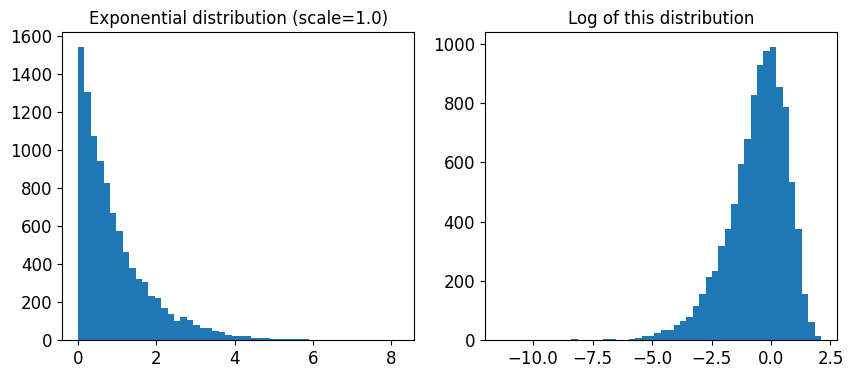

In [ ]:
expon_distrib = expon(scale=1.)
samples = expon_distrib.rvs(10000, random_state=42)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Exponential distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()

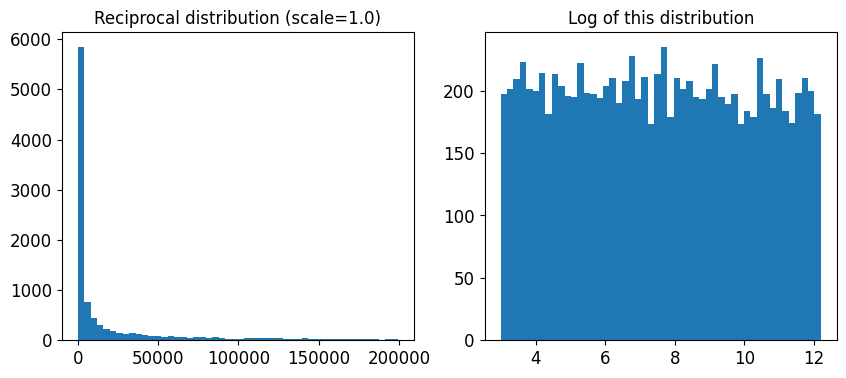

In [ ]:
reciprocal_distrib = reciprocal(20, 200000)
samples = reciprocal_distrib.rvs(10000, random_state=42)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Reciprocal distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()

**3. Tente acrescentar um transformador no pipeline de preparação para selecionar apenas
os atributos mais importantes.**

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]

# Nota: este seletor de características assume que você já calculou as importâncias das características de alguma forma (por exemplo, usando um RandomForestRegressor). Você pode ser tentado a calculá-las diretamente no método fit() do TopFeatureSelector, no entanto, isso provavelmente desaceleraria a busca em grade/randômica, já que as importâncias das características teriam que ser calculadas para cada combinação de hiperparâmetros (a menos que você implemente algum tipo de cache).

# Vamos definir o número de principais características que queremos manter:
k = 5

# Agora vamos procurar os índices das k principais características:
top_k_feature_indices = indices_of_top_k(feature_importances, k)
top_k_feature_indices


array([ 0,  1,  7,  9, 12])

In [ ]:
np.array(attributes)[top_k_feature_indices]

array(['longitude', 'latitude', 'median_income', 'pop_per_hhold',
       'INLAND'], dtype='<U18')

In [ ]:
sorted(zip(feature_importances, attributes), reverse=True)[:k]

[(0.3790092248170967, 'median_income'),
 (0.16570630316895876, 'INLAND'),
 (0.10703132208204354, 'pop_per_hhold'),
 (0.06965425227942929, 'longitude'),
 (0.0604213840080722, 'latitude')]

In [ ]:
preparation_and_feature_selection_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k))
])

# Vamos olhar as características das primeiras 3 instâncias:
housing_prepared_top_k_features = preparation_and_feature_selection_pipeline.fit_transform(housing)
housing_prepared_top_k_features[0:3]


array([[-0.94135046,  1.34743822, -0.8936472 ,  0.00622264,  1.        ],
       [ 1.17178212, -1.19243966,  1.292168  , -0.04081077,  0.        ],
       [ 0.26758118, -0.1259716 , -0.52543365, -0.07537122,  1.        ]])

In [ ]:
housing_prepared[0:3, top_k_feature_indices]

array([[-0.94135046,  1.34743822, -0.8936472 ,  0.00622264,  1.        ],
       [ 1.17178212, -1.19243966,  1.292168  , -0.04081077,  0.        ],
       [ 0.26758118, -0.1259716 , -0.52543365, -0.07537122,  1.        ]])

**4. Tente criar um pipeline único que faça a preparação completa de dados mais a previsão
final.**

In [ ]:
prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k)),
    ('svm_reg', SVR(**rnd_search.best_params_))
])
prepare_select_and_predict_pipeline.fit(housing, housing_labels)

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('attribs_adder',
                                                                   FunctionTransformer(func=<function add_extra_features at 0x7c5e4d6c9c60>)),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'househ...
                 TopFeatureSelector(feature_importances=array([6.96542523e-02, 6.04213840e-02, 4.21882202e-02, 1.52450557e-02,
       1.55545295e-02, 1.58491147e-02, 1.49346552e-02, 3.79009225e-01,
       5.47789150e-02, 1.07031322e-01, 4.82031213e-02, 6.79266007e-03,
       1.65706303e-01, 7.83480660e-05, 1.52473276e-03, 3.02816106e-03]),
                                    k=5)),
                ('svm_reg',
                 SVR(C=157055.10989448498, gamma=0.26497040005002437))])

In [ ]:
some_data = housing.iloc[:4]
some_labels = housing_labels.iloc[:4]

print("Predictions:\t", prepare_select_and_predict_pipeline.predict(some_data))
print("Labels:\t\t", list(some_labels))

Predictions:	 [ 83384.49158095 299407.90439234  92272.03345144 150173.16199041]
Labels:		 [72100.0, 279600.0, 82700.0, 112500.0]


**5. Explore automaticamente algumas opções de preparação utilizando o GridSearchCV**

In [ ]:
param_grid = [{
    'preparation__num__imputer__strategy': ['mean', 'median', 'most_frequent'],
    'feature_selection__k': list(range(1, len(feature_importances) + 1))
}]

grid_search_prep = GridSearchCV(prepare_select_and_predict_pipeline, param_grid, cv=5,
                                scoring='neg_mean_squared_error', verbose=2, n_jobs=4)
grid_search_prep.fit(housing, housing_labels)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
9 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 423, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preparation',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('attribs_adder',
                                                                                          FunctionTransformer(func=<function add_extra_features at 0x7c5e4d6c9c60>)),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         ['longitude',
                                                                          'latitude',
                                                                          'housing_median_age',
                                                                          'total_rooms',
                                                                          'total_be...
       5.47789150e-02, 1.07031322e-01, 4.82031213e-02, 6.79266007e-03,
       1.65706303e-01, 7.83480660e-05, 1.52473276e-03, 3.02816106e-03]),
                                                           k=5)),
                                       ('svm_reg',
                                        SVR(C=157055.10989448498,
                                            gamma=0.26497040005002437))]),
             n_jobs=4,
             param_grid=[{'feature_selection__k': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16],
                          'preparation__num__imputer__strategy': ['mean',
                                                                  'median',
                                                                  'most_frequent']}],
             scoring='neg_mean_squared_error', verbose=2)

In [ ]:
grid_search_prep.best_params_

NameError: name 'grid_search_prep' is not defined